## Task-D: Collinear features and their effect on linear models

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [2]:
data = pd.read_csv('task_d.csv')
#df = pd.DataFrame(m.data,columns=m.feature_names)
#print(data)
#X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, train_size=.7)

In [3]:
data.head()
data.ndim
#data.get_feature_names()

2

In [18]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values
#data.shape
X.shape

(100, 7)

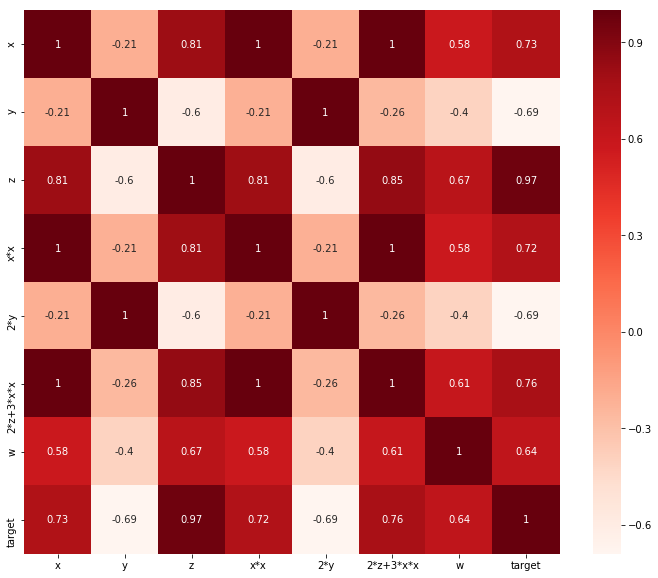

In [19]:
#df = pd.DataFrame(X.data)
#df["MEDV"] = X.target
#X = df.drop("MEDV",1)   #Feature Matrix
#y = df["MEDV"]          #Target Variable
#df.head()
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [20]:
cor_target = abs(cor["target"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

x            0.728290
y            0.690684
z            0.969990
x*x          0.719570
2*y          0.690684
2*z+3*x*x    0.764729
w            0.641750
target       1.000000
Name: target, dtype: float64

In [21]:
tuned_parameters = [{'C':[10**-4, 10**-2, 10**0, 10**2, 10**4]}]
model = GridSearchCV(LogisticRegression(),tuned_parameters,scoring='f1')
model.fit(X,Y)
print(model.best_params_)
print(model.best_estimator_)
#print(model.coef_)

{'C': 0.0001}
LogisticRegression(C=0.0001)


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, stratify=Y)
best_model = LogisticRegression(C=0.0001).fit(X_train,Y_train)
#print(best_model_accuracy)
W = best_model.coef_
print(W)
best_model_accuracy = best_model.score(X_test, Y_test)
print(best_model_accuracy)

[[ 0.00234184 -0.00226974  0.00315172  0.00231378 -0.00226974  0.00246294
   0.00195766]]
0.48484848484848486


In [23]:
mu, sigma = 0, 0.01
noise = np.random.normal(mu, sigma, [100,7])
X_dash = X + noise
#best_model_accuracy_edited = best_model.score(X_dash,Y)
#print(best_model_accuracy_edited)
#W_dash = best_model.coef_
#print(W_dash)
X_tr, X_t, Y_tr, Y_t = train_test_split(X_dash, Y, test_size=0.33, stratify=Y)
best_model = LogisticRegression(C=0.0001).fit(X_tr,Y_tr)
W_dash = best_model.coef_
print(W_dash)
best_model_accuracy_edited = best_model.score(X_t, Y_t)
print("Logistic regression accuracy:",best_model_accuracy_edited)

[[ 0.00229193 -0.00276144  0.00319206  0.00229219 -0.00275603  0.00244375
   0.00216915]]
Logistic regression accuracy: 0.48484848484848486


By adding noise to the model weights got altered to some extent. However, Accuracy remained same.

In [24]:
diff = best_model_accuracy_edited - best_model_accuracy
diff_weight = W - W_dash
print(diff)
print(abs(diff_weight))

0.0
[[4.99119257e-05 4.91700047e-04 4.03328045e-05 2.15916513e-05
  4.86289035e-04 1.91856315e-05 2.11490192e-04]]


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, stratify=Y)
clf = SGDClassifier(max_iter=1000)
C = [0.0001,0.001, 0.01, 0.1, 1, 10]
tuned_parameters = [{'alpha': C}]
model = GridSearchCV(clf, tuned_parameters, scoring = 'accuracy', cv=2)
model.fit(X_train, Y_train)
print(model.best_params_)
print(model.best_estimator_)

{'alpha': 0.0001}
SGDClassifier()


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, stratify=Y)
best_model = LinearSVC(C=0.0001).fit(X_train,Y_train)
#print(best_model_accuracy)
W = best_model.coef_
print(W)
best_model_accuracy = best_model.score(X_test, Y_test)
print(best_model_accuracy)

[[ 0.00976925 -0.00854172  0.01235534  0.0096313  -0.00854172  0.01015995
   0.00904386]]
1.0


In [27]:
mu, sigma = 0, 0.01
noise = np.random.normal(mu, sigma, [100,7])
X_dash = X + noise
best_model = LinearSVC(C=0.0001).fit(X_tr,Y_tr)
W_dash = best_model.coef_
print(W_dash)
best_model_accuracy_edited = best_model.score(X_t, Y_t)
print("Linear SVM accuracy:", best_model_accuracy_edited)

[[ 0.008648   -0.01052022  0.01213611  0.00864339 -0.01049963  0.00922673
   0.00817984]]
Linear SVM accuracy: 1.0


In [28]:
diff = best_model_accuracy_edited - best_model_accuracy
diff_weight = W - W_dash
print(diff)
print(abs(diff_weight))

0.0
[[0.00112125 0.0019785  0.00021924 0.00098791 0.00195791 0.00093321
  0.00086402]]


Even in case of linear SVM by adding noise to the model weights got altered to some extent. However, Accuracy remained same.

In [29]:
coefs=best_model.coef_[0]
top_four = np.argpartition(coefs, -4)[-4:]
top_four_sorted=top_four[np.argsort(coefs[top_four])]
print(data.columns[top_four_sorted])

Index(['x*x', 'x', '2*z+3*x*x', 'z'], dtype='object')


### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>